In [1]:
import os
from langgraph.graph import StateGraph, END, START
from state import GraphState
from nodes import reasoning_node, action_node
from langchain_core.messages import HumanMessage

/Users/arvindna/Desktop/Desktop Folders/venvs/Workshop Prep/MCP-Agents-Workshop/MCP_Workshop_Master/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#for langsmith tracing
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Agentic-Workshop"

In [3]:
# Define the graph

REASON_NODE = 'reasoning_node'
ACTION_NODE = 'action_node'


# conditional edge function
def router_function(state: GraphState):
    if state["messages"][-1].tool_calls:
        return ACTION_NODE
    else:
        return END
    
graph = StateGraph(GraphState)

graph.add_node(REASON_NODE, reasoning_node)
graph.add_node(ACTION_NODE, action_node)

graph.add_edge(START, REASON_NODE)
graph.add_conditional_edges(REASON_NODE, router_function, {ACTION_NODE: ACTION_NODE, END: END})
graph.add_edge(ACTION_NODE, REASON_NODE)


agent = graph.compile()

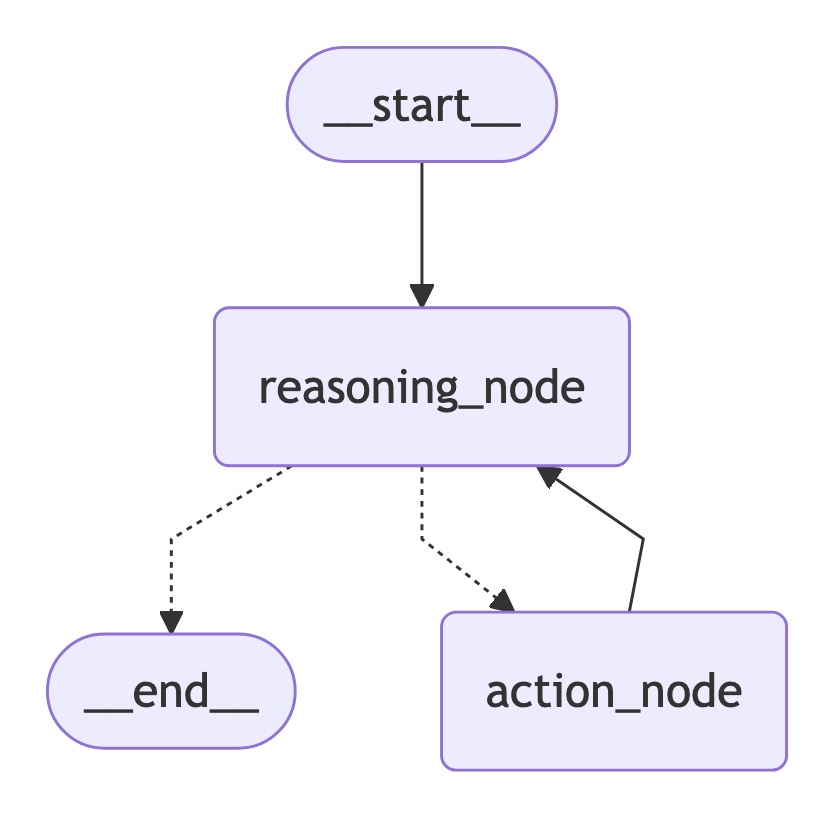

In [5]:
#Visualize the graph
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
import nest_asyncio

nest_asyncio.apply()  # Required for Jupyter Notebook to run async functions

display(
    Image(
        agent.get_graph().draw_mermaid_png(
            curve_style=CurveStyle.LINEAR,
            node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#fad7de"),
            wrap_label_n_words=9,
            output_file_path=None,
            draw_method=MermaidDrawMethod.PYPPETEER,
            background_color="white",
            padding=10,
        )
    )
)

In [6]:
user_message = "Can I return order id 1002"

# "Can I return my tablet, order id is 1002"
# "What is the return policy?" 

In [8]:
#Invoke the support agent
messages = agent.invoke({"messages": [HumanMessage(content=user_message)]})
for message in messages["messages"]:
    print(message)

content='Can I return order id 1002' additional_kwargs={} response_metadata={}
content='' additional_kwargs={'function_call': {'name': 'get_product_details', 'arguments': '{"order_id": "1002"}'}} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []} id='run--f9d1ba38-83d2-4270-aad5-549a79d6f5a1-0' tool_calls=[{'name': 'get_return_policy', 'args': {}, 'id': 'cb7f4115-2550-4b2c-8551-13cc41ae0c4a', 'type': 'tool_call'}, {'name': 'get_product_details', 'args': {'order_id': '1002'}, 'id': '68e44514-fa0b-4790-a504-95f750d1854b', 'type': 'tool_call'}] usage_metadata={'input_tokens': 99, 'output_tokens': 17, 'total_tokens': 116, 'input_token_details': {'cache_read': 0}}
content='You can return the product within 30 days of purchase for a full refund.' tool_call_id='cb7f4115-2550-4b2c-8551-13cc41ae0c4a'
content='The product details for order 1002 are as follows:          product_name: Tab

### Prebuilt Agent

In [3]:
from langgraph.prebuilt import create_react_agent
from langchain_google_genai import ChatGoogleGenerativeAI
from tools import get_return_policy, get_current_date, get_product_details

# llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-preview-04-17")
tools = [get_return_policy, get_current_date, get_product_details]
# tools = [get_return_policy_for_phone, get_return_policy_for_tablet, get_current_date, get_product_details]

prebuilt_agent = create_react_agent(
    model = llm,
    tools=tools,
    prompt="You are a helpful support agent. You are given a user's query and you need to reason about the user's query and call the necessary tools to answer the user's query.",
)

In [4]:
user_message = "Can I return order id 1002"

#Invoke the support agent
messages = prebuilt_agent.invoke({"messages": [HumanMessage(content=user_message)]})
for message in messages["messages"]:
    print(message)

content='Can I return order id 1002' additional_kwargs={} response_metadata={} id='1a20be07-7cea-4633-830b-9b7f0d2f7a4d'
content="Okay, I can help you with that. I need to check the return policy and the details of your order (ID 1002) to determine if it's eligible for return." additional_kwargs={'function_call': {'name': 'get_product_details', 'arguments': '{"order_id": "1002"}'}} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run--c4eb0cdc-a275-4e8d-a5ce-5f6d42154641-0' tool_calls=[{'name': 'get_return_policy', 'args': {}, 'id': 'd4c99412-02f2-47ea-ac6b-88a0eb57348f', 'type': 'tool_call'}, {'name': 'get_product_details', 'args': {'order_id': '1002'}, 'id': 'a16cfb5c-1122-454f-90a8-bf65aa0cafa5', 'type': 'tool_call'}] usage_metadata={'input_tokens': 163, 'output_tokens': 75, 'total_tokens': 603, 'input_token_details': {'cache_read': 0}}
content='You can return the product within 30 days of purchase fo